Delivery_time->predict delivery time using sortin time.
dataset=delivery_time.csv
y-continuous (dependent), x-single and continuous (independent) ==> y-delivery time, x-sortin time,
So we go simple linear regression.

# Reading csv file using pandas library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("delivery_time.csv")

#  EDA

In [3]:
df.head()

,Dt,St
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Correlation

In [4]:
df.corr()

,Dt,St
Dt,1.000000,0.825997
St,0.825997,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dt      21 non-null     float64
 1   St      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df.describe()

,Dt,St
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Text(0, 0.5, 'Delivery Time')

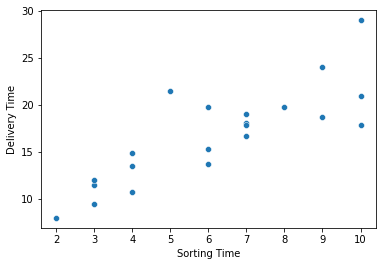

In [7]:
sns.scatterplot(x=df['St'],y=df['Dt'])
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

{'whiskers': [<matplotlib.lines.Line2D at 0x2af151fc190>,
 'caps': [<matplotlib.lines.Line2D at 0x2af151fc850>,
 'boxes': [<matplotlib.lines.Line2D at 0x2af151ebdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x2af151fcf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2af152052b0>],
 'means': []}

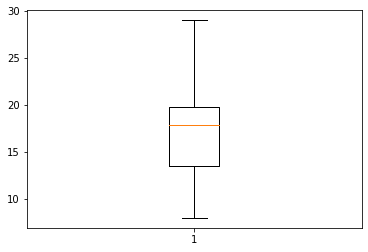

In [8]:
plt.boxplot(df.Dt)

(array([1., 1., 0., 1., 2., 0., 2., 0., 2., 0., 1., 2., 2., 2., 1., 1., 1.,
        0., 0., 1., 0., 0., 0., 0., 1.]),
 array([ 8.  ,  8.84,  9.68, 10.52, 11.36, 12.2 , 13.04, 13.88, 14.72,
        15.56, 16.4 , 17.24, 18.08, 18.92, 19.76, 20.6 , 21.44, 22.28,
        23.12, 23.96, 24.8 , 25.64, 26.48, 27.32, 28.16, 29.  ]),
 <BarContainer object of 25 artists>)

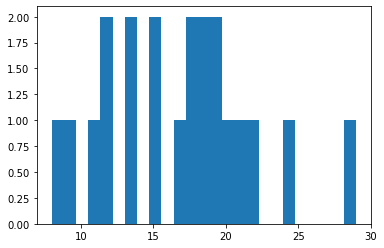

In [9]:
plt.hist(df.Dt,bins=25)

In [10]:
df.corr()

,Dt,St
Dt,1.000000,0.825997
St,0.825997,1.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Dt', ylabel='Density'>

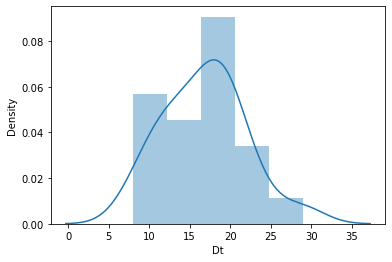

In [11]:
sns.distplot(df['Dt'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='St', ylabel='Density'>

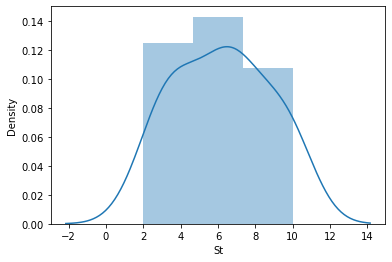

In [12]:
sns.distplot(df['St'])

# Fitting a linear regression model

In [13]:
import statsmodels.formula.api as smf

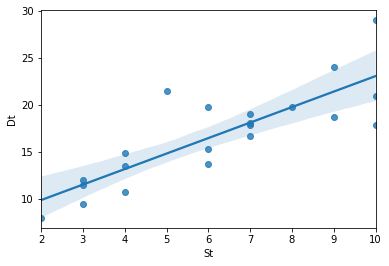

In [14]:
sns.regplot(x="St", y="Dt", data=df);

In [15]:
model2=smf.ols("Dt~St",data=df).fit()

In [16]:
model2.params

Intercept    6.582734
St           1.649020
dtype: float64

In [17]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 12 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        09:30:57   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
St             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model3=smf.ols("Dt~np.log(St)",data=df).fit()

In [19]:
model3.params

Intercept     1.159684
np.log(St)    9.043413
dtype: float64

In [20]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 12 Jun 2021   Prob (F-statistic):           2.64e-06
Time:                        09:30:59   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(St)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model2.conf_int(0.05) #95% confidence interval

,0,1
Intercept,2.979134,10.186334
St,1.108673,2.189367


In [22]:
model3.conf_int(0.05) #95% confidence interval

,0,1
Intercept,-3.97778,6.297147
np.log(St),6.16977,11.917057


In [23]:
pred2=model2.predict(df) #predicted values of Dt using the model

In [24]:
pred3=model3.predict(df) #predicted values of Dt using the model 

Text(0, 0.5, 'Delivery Time')

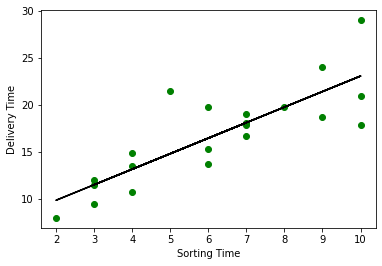

In [25]:
plt.scatter(x=df.St, y=df.Dt, color='green')
plt.plot(df.St, pred2, color='black')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

Text(0, 0.5, 'Delivery Time')

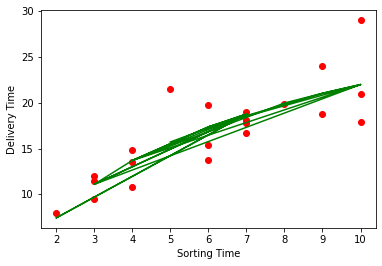

In [26]:
plt.scatter(x=df.St, y=df.Dt, color='red')
plt.plot(df.St, pred3, color='green')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")